## Data Cleansing and preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
## import the dataset
youtube=pd.read_csv("C://Users//francesco//Desktop//BigData_Assignment_29Oct//YouTube_dataset_UK.csv")

In [ ]:
youtube.info()  ## 38916 entries

In [ ]:
youtube.head()  ## shows the first few rows, it needs cleansing

In [ ]:
youtube['count'] = youtube.groupby('title')['title'].transform('count')
## like this I want to add a column counting the times the single objects are showing
### insired by https://stackoverflow.com/questions/29791785/python-pandas-add-a-column-to-my-dataframe-that-counts-a-variable

In [ ]:
youtube2=youtube.groupby('title')
YouTube=youtube2.min()
## I want to keep the min values in order to have data related to the first day of trending

In [ ]:
YouTube.count()  ## grouping the same video it reduces at 3369 entries

In [ ]:
YouTube['category_id'].value_counts()  ## categories will be decodified later

In [ ]:
YouTube['tags'] = YouTube['tags'].str.replace(r"[\"|',]", " ")
## Cleansing of the tag column, the str.replace() function takes off the special characters

## Exploratory Analysis and Descriptive Statistics

In [ ]:
YouTube['count'].mean()
## the average of days that a video keeps trending

In [ ]:
l=YouTube['likes'].mean()
d=YouTube['dislikes'].mean()
## the average l/d ratio for videos
l/d

In [89]:
tag_count=YouTube.tags.str.split(expand=True).stack().value_counts()
tag_count.head(20)
## Counting the most popular tags among tranding videos
### inspired by https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame

the        1226
video       715
The         694
music       629
funny       604
new         471
show        442
of          439
2018        435
Show        401
live        356
comedy      352
to          350
2017        342
and         317
Late        306
Music       285
trailer     285
movie       282
ellen       282
dtype: int64

In [90]:
YouTube['l/d_ratio'] = round(YouTube.likes / YouTube.dislikes, 2)
## add a column with the ratio likes/dislkies (rounded by 2 decimals)

In [91]:
## now I should look at the tags among the most trending video
a=YouTube.sort_values(by='count', ascending=False)
yhead=a.head(100)
yhead.head()

,video_id,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,count,l/d_ratio
title,,,,,,,,,,,,,,,,
Maroon 5 - Wait,4uTNVumfm84,18.01.03,Maroon5VEVO,10,2018-01-17T17:00:03.000Z,Maroon Wait 222 Records/Interscope Reco...,2455067,197021,3139,11350,https://i.ytimg.com/vi/4uTNVumfm84/default.jpg,False,False,False,40,62.77
To Our Daughter,BhIEIO0vaBE,18.01.03,Kylie Jenner,22,2018-02-04T20:27:38.000Z,Kylie Jenner Kylie Travis Scott Baby An...,20921796,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,38,NaN
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights,2z3EUY1aXdY,18.01.03,NFL,17,2018-02-05T01:51:53.000Z,NFL Football offense defense afc nfc ...,2027569,50251,15239,14413,https://i.ytimg.com/vi/2z3EUY1aXdY/default.jpg,False,False,False,38,3.30
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD],NooW_RbfdWI,18.01.03,Universal Pictures,24,2018-02-04T23:28:16.000Z,Jurassic World Fallen Kingdom Dinosaur T-...,1999326,61833,1416,6400,https://i.ytimg.com/vi/NooW_RbfdWI/default.jpg,False,False,False,38,43.67
Anne-Marie - 2002 [Official Video],Il-an3K9pjg,18.01.06,Anne-Marie,10,2018-05-08T11:05:08.000Z,anne marie anne-marie 2002 two thousand...,1070242,108344,1040,7571,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,38,104.18


In [92]:
tag_count2=yhead.tags.str.split(expand=True).stack().value_counts()
tag_count2.head(20)
## these are the most popular tags among the top 100 videos that trended for more days

the         28
pasta       24
music       22
video       21
Maluma      19
george      18
ezra        18
Records     18
Music       17
Pop         15
me          14
Kanye       14
Hop         14
perry       14
katy        14
a           13
official    13
2018        12
makeup      12
new         12
dtype: int64

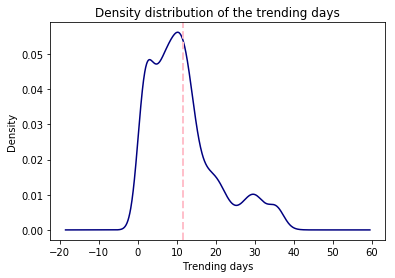

In [93]:
## Density graph for the trending days count
count=YouTube["count"]
count.plot.density(color='navy')
plt.title('Density distribution of the trending days')
plt.axvline(count.mean(), color='pink', linestyle='dashed', linewidth=2)  ## mean
plt.xlabel('Trending days')
plt.show()

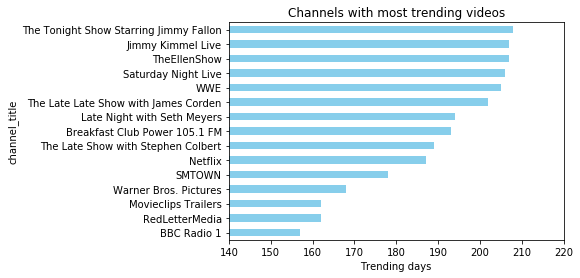

In [94]:
w=YouTube.groupby('channel_title')
w1=w['count'].sum().sort_values(ascending=False).head(15)
w1.sort_values(ascending=True).plot.barh(color='skyblue')
plt.xlabel('Trending days')
plt.title('Channels with most trending videos')
plt.xlim(140,220)
plt.show()
## these are the top 20 channels that got most trending videos

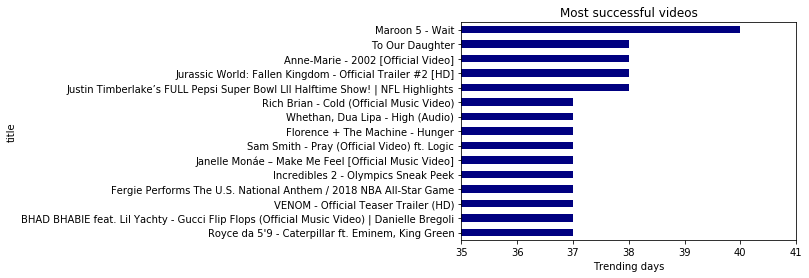

In [95]:
r=YouTube.groupby('title')
r1=r['count'].sum().sort_values(ascending=False).head(15)
r1.sort_values(ascending=True).plot.barh(color='navy')
plt.xlabel('Trending days')
plt.title('Most successful videos')
plt.xlim(35,41)
plt.show()
## Top 15 most trending videos

In [96]:
r1=r['count','l/d_ratio'].sum()
r1.sort_values(by=['count'],ascending=False).head(10)
## number of trending days and ratio compared

,count,l/d_ratio
title,,
Maroon 5 - Wait,40,62.77
To Our Daughter,38,0.00
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights,38,3.30
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD],38,43.67
Anne-Marie - 2002 [Official Video],38,104.18
"Royce da 5'9 - Caterpillar ft. Eminem, King Green",37,100.20
BHAD BHABIE feat. Lil Yachty - Gucci Flip Flops (Official Music Video) | Danielle Bregoli,37,13.17
"Whethan, Dua Lipa - High (Audio)",37,155.70
Sam Smith - Pray (Official Video) ft. Logic,37,64.11


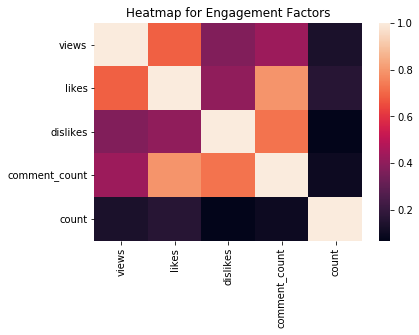

In [97]:
## Heatmap for the engagement factors
import seaborn as sns
corr=YouTube[['views','likes','dislikes','comment_count','count']].corr()
sns.heatmap(corr)
plt.title('Heatmap for Engagement Factors')
plt.show()
## The only relevant correlation seems to be between comments and likes, as quite obviously should be

In [98]:
YouTube['comment_count'].corr(YouTube['likes'])  ## see more accuratly the correlation between variables
## 0.79 so high correlation

0.7944917013783993

In [99]:
YouTube['comment_count'].corr(YouTube['dislikes'])
## people are more likely to comment if they put like rather than dislike

0.7244357422964802

In [100]:
YouTube['count'].corr(YouTube['likes'])

0.16428136224297982

In [101]:
YouTube['l/d_ratio']=YouTube['l/d_ratio'].real.astype(int,casting='unsafe')
YouTube['v/l_ratio'] = round(YouTube.views / YouTube.likes,2)
YouTube['v/l_ratio']=YouTube['v/l_ratio'].real.astype(int,casting='unsafe')
YouTube['v/d_ratio'] = round(YouTube.views / YouTube.dislikes,2)
YouTube['v/d_ratio']=YouTube['v/d_ratio'].real.astype(int,casting='unsafe')
YouTube['v/c_ratio'] = round(YouTube.views / YouTube.comment_count,2)
YouTube['v/c_ratio']=YouTube['v/c_ratio'].real.astype(int,casting='unsafe')
YouTube.dtypes
## create new 3 ratio columns
## the outputs are float64, some of them are complex numbers, convert them to real integers (easier to use)

video_id                  object
trending_date             object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
count                      int64
l/d_ratio                  int32
v/l_ratio                  int32
v/d_ratio                  int32
v/c_ratio                  int32
dtype: object

## Unsupervised Method, Cluster Analysis

In [102]:
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [103]:
## Before starting my analysis I drop every videos with comments or reaction disabled
YouTube2=YouTube[(YouTube[['likes','comment_count']] != 0).all(axis=1)]
YouTube2.count()
## it dropped 69 rows

video_id                  3300
trending_date             3300
channel_title             3300
category_id               3300
publish_time              3300
tags                      3300
views                     3300
likes                     3300
dislikes                  3300
comment_count             3300
thumbnail_link            3300
comments_disabled         3300
ratings_disabled          3300
video_error_or_removed    3300
count                     3300
l/d_ratio                 3300
v/l_ratio                 3300
v/d_ratio                 3300
v/c_ratio                 3300
dtype: int64

In [104]:
## Cluster Analysis
### create a subset with only the variables I want to base my model on, and scale it
YTclust=YouTube2.values[:,8:10]
YTscale=scale(YTclust)  ## scale the data

C:\Users\francesco\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by the scale function.



In [105]:
## Elbow method
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km4 = KMeans(n_clusters=k)
    km4 = km4.fit(YTscale)
    Sum_of_squared_distances.append(km4.inertia_)

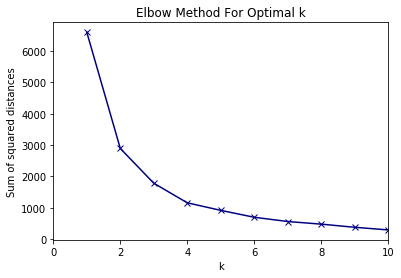

In [106]:
plt.plot(K, Sum_of_squared_distances, 'bx-',color='navy')
plt.xlim(0,10)
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()
## inspired by https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [107]:
## Now I want to try for k in range 2:10
for k in range(2, 11):
 kmeans3= cluster.KMeans(n_clusters=k)
 kmeans3.fit(YTscale)
 print(k)
 print(metrics.silhouette_score(YTscale, kmeans3.labels_))

2
0.9829321846936201
3
0.9711392051590121
4
0.9139226679713924
5
0.8990758732626871
6
0.8363611001882756
7
0.8489744464977279
8
0.8264489504706619
9
0.8498343769876806
10
0.7811541562956444


In [108]:
## Run the clustering
kmeans5=KMeans(n_clusters=5, random_state=1)
kmeans5=kmeans5.fit(YTscale)
YouTube2.loc[:,'labelsK5']=kmeans5.labels_
YouTube2['labelsK5'].value_counts()

C:\Users\francesco\Anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\francesco\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0    3190
3      98
4       5
2       5
1       2
Name: labelsK5, dtype: int64

(-194001.61131197007, 4074077.61131197)

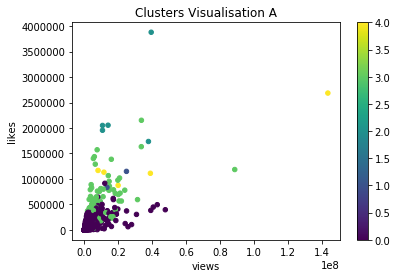

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(YouTube2['views'],YouTube2['likes'],
                     c=kmeans5.labels_,s=20)
ax.set_title('Clusters Visualisation A')
ax.set_xlabel('views')
ax.set_ylabel('likes')
plt.colorbar(scatter)
plt.xlim()
plt.ylim()
## plot a scatterplot v/l

(-31456.161311970085, 660579.1613119701)

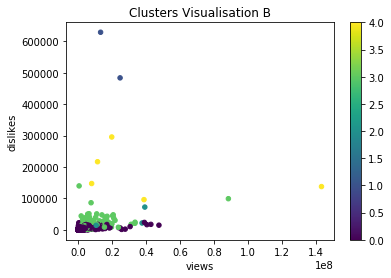

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(YouTube2['views'],YouTube2['dislikes'],
                     c=kmeans5.labels_,s=20)
ax.set_title('Clusters Visualisation B')
ax.set_xlabel('views')
ax.set_ylabel('dislikes')
plt.colorbar(scatter)
plt.xlim()
plt.ylim()
## plot a scatterplot v/d

(-36667.51131197009, 770039.5113119702)

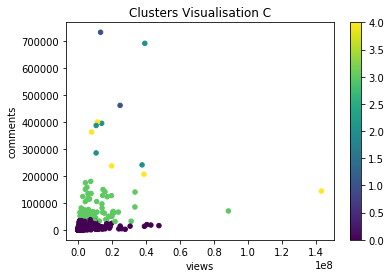

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(YouTube2['views'],YouTube2['comment_count'],
                     c=kmeans5.labels_,s=20)
ax.set_title('Clusters Visualisation C')
ax.set_xlabel('views')
ax.set_ylabel('comments')
plt.colorbar(scatter)
plt.xlim()
plt.ylim()
## plot a scatterplot v/c

(0, 15000)

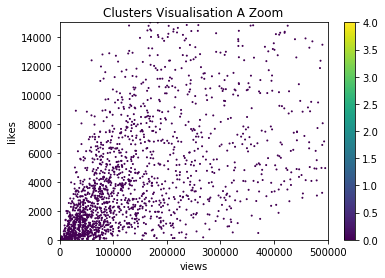

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(YouTube2['views'],YouTube2['likes'],
                     c=kmeans5.labels_,s=1)
ax.set_title('Clusters Visualisation A Zoom')
ax.set_xlabel('views')
ax.set_ylabel('likes')
plt.colorbar(scatter)
plt.xlim(0,500000)
plt.ylim(0,15000)
## zoomed scatterplot v/l

(0, 500)

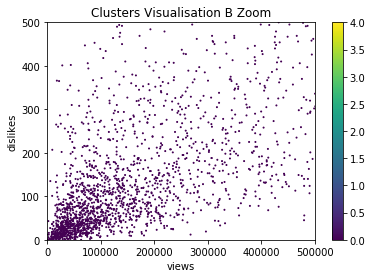

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(YouTube2['views'],YouTube2['dislikes'],
                     c=kmeans5.labels_,s=1)
ax.set_title('Clusters Visualisation B Zoom')
ax.set_xlabel('views')
ax.set_ylabel('dislikes')
plt.colorbar(scatter)
plt.xlim(0,500000)
plt.ylim(0,500)
## zoomed scatterplot v/d

(0, 2000)

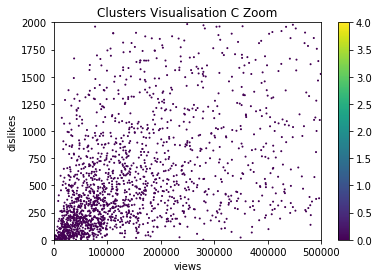

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(YouTube2['views'],YouTube2['comment_count'],
                     c=kmeans5.labels_,s=1)
ax.set_title('Clusters Visualisation C Zoom')
ax.set_xlabel('views')
ax.set_ylabel('dislikes')
plt.colorbar(scatter)
plt.xlim(0,500000)
plt.ylim(0,2000)
## zoomed scatterplot v/c

## Supervised method, Linear Regression

In [115]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [116]:
## Regression Model 1
independent_variables0 = ['views','likes','dislikes','comment_count']
X0 = YouTube2[independent_variables0]
y0 = YouTube2['count']
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, train_size=.80,
random_state=1)
lm0 = sm.OLS(y_train0, X_train0).fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           2.19e-82
Time:                        12:53:41   Log-Likelihood:                -10600.
No. Observations:                2640   AIC:                         2.121e+04
Df Residuals:                    2636   BIC:                         2.123e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
views          4.263e-08   9.57e-08      0.445      0.656   -1.45e-07     2.3e-07
likes          4.273e-05   4.42e-06      9.667      0.000    3.41e-05    5.14e-05
dislikes       8.977e-05   3.01e-05      2.983      0.003    3.08e-05       0.000
comment_count    -0.0001   2.69e-05     -5.207      0.000      -0.000   -8.73e-05
==============================================================================
Omnibus:                      729.707   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23851.718
Skew:                          -0.646   Prob(JB):                         0.00
Kurtosis:                      17.669   Cond. No.                         678.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
y_train_pred0 = lm0.predict(X_train0)
y_test_pred0 = lm0.predict(X_test0)

In [118]:
metrics.mean_absolute_error(y_train0, y_train_pred0)

10.495300550459714

In [119]:
metrics.mean_absolute_error(y_test0, y_test_pred0)

10.843759248486952

In [121]:
## Model 2
independent_variables = ['views','likes','dislikes','comment_count','l/d_ratio','v/l_ratio','v/d_ratio','v/c_ratio']
X = YouTube2[independent_variables]
y = YouTube2['count']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80,
random_state=1)

In [123]:
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     114.3
Date:                Sun, 04 Nov 2018   Prob (F-statistic):          2.60e-164
Time:                        12:53:44   Log-Likelihood:                -10400.
No. Observations:                2640   AIC:                         2.082e+04
Df Residuals:                    2632   BIC:                         2.086e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
views         -1.298e-07   8.92e-08     -1.455      0.146   -3.05e-07    4.51e-08
likes          4.333e-05    4.1e-06     10.559      0.000    3.53e-05    5.14e-05
dislikes          0.0001    2.8e-05      4.102      0.000    5.99e-05       0.000
comment_count    -0.0001    2.5e-05     -5.942      0.000      -0.000   -9.94e-05
l/d_ratio        -0.0015   7.54e-05    -19.985      0.000      -0.002      -0.001
v/l_ratio        -0.0003      0.000     -0.808      0.419      -0.001       0.000
v/d_ratio         0.0015   7.54e-05     19.985      0.000       0.001       0.002
v/c_ratio      2.957e-05   1.62e-05      1.821      0.069   -2.28e-06    6.14e-05
==============================================================================
Omnibus:                      665.238   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10288.149
Skew:                          -0.766   Prob(JB):                         0.00
Kurtosis:                      12.549   Cond. No.                     3.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [125]:
metrics.mean_absolute_error(y_train, y_train_pred)

9.193348450767813

In [126]:
np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

12.43588991940196

In [127]:
metrics.mean_absolute_error(y_test, y_test_pred)

9.571856102991571

In [128]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

12.86225679856369

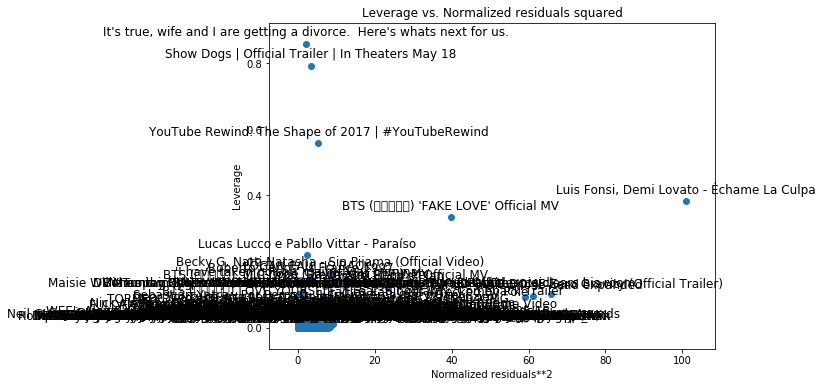

In [129]:
## Leverage vs Residuals plot for Model 2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(lm, ax = ax)

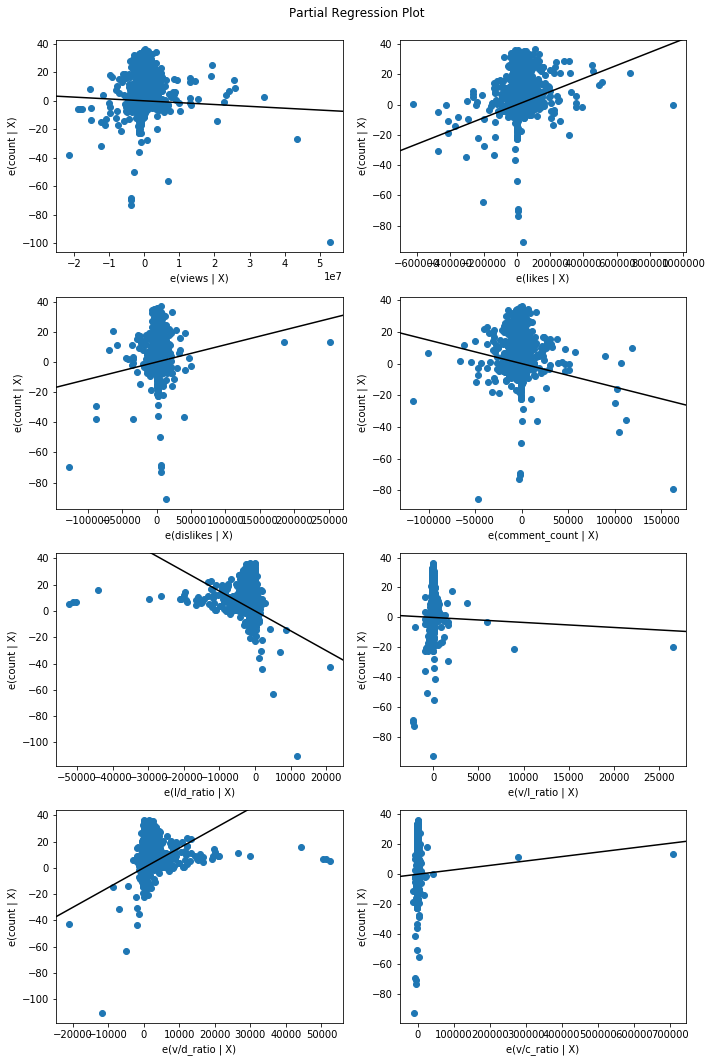

In [130]:
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)
## partial regression plot for Model 2

In [131]:
## Model for Music Category
YouTubeMusic=YouTube2.loc[YouTube2['category_id'] ==10]
X1 = YouTubeMusic[independent_variables]
y1 = YouTubeMusic['count']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=.80,
random_state=1)
lm1 = sm.OLS(y_train1, X_train1).fit()
y_train_pred1 = lm1.predict(X_train1)
y_test_pred1 = lm1.predict(X_test1)
Music=metrics.mean_absolute_error(y_test1, y_test_pred1)
Music

12.803828868179886

In [132]:
YouTubeMusic['count'].mean()
## in order to compare the MAE to the mean

15.172566371681416

In [133]:
## Model for People and Blogs Category
YouTubePeB=YouTube2.loc[YouTube2['category_id'] ==22]
X2 = YouTubePeB[independent_variables]
y2 = YouTubePeB['count']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=.80,
random_state=1)
lm2 = sm.OLS(y_train2, X_train2).fit()
y_train_pred2 = lm2.predict(X_train2)
y_test_pred2 = lm2.predict(X_test2)
People_Blogs=metrics.mean_absolute_error(y_test2, y_test_pred2)
People_Blogs

6.972046722917971

In [134]:
YouTubePeB['count'].mean()

9.926829268292684

In [135]:
## Model for Entertainement Category
YouTubeEnt=YouTube2.loc[YouTube2['category_id'] ==24]
X3 = YouTubeEnt[independent_variables]
y3 = YouTubeEnt['count']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size=.80,
random_state=1)
lm3 = sm.OLS(y_train3, X_train3).fit()
y_train_pred3 = lm3.predict(X_train3)
y_test_pred3 = lm3.predict(X_test3)
Entertainement=metrics.mean_absolute_error(y_test3, y_test_pred3)
Entertainement

19.390520628081113

In [136]:
YouTubeEnt['count'].mean()

10.339201877934272

In [137]:
## Model for Film Category
YouTubeFilm=YouTube2.loc[YouTube2['category_id'] ==1]
X4 = YouTubeFilm[independent_variables]
y4 = YouTubeFilm['count']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, train_size=.80,
random_state=1)
lm4 = sm.OLS(y_train4, X_train4).fit()
y_train_pred4 = lm4.predict(X_train4)
y_test_pred4 = lm4.predict(X_test4)
Film=metrics.mean_absolute_error(y_test4, y_test_pred4)
Film

8.77850220970362

In [138]:
YouTubeFilm['count'].mean()

12.785340314136125

In [139]:
## Model for Sports Category
YouTubeSports=YouTube2.loc[YouTube2['category_id'] ==17]
X5 = YouTubeSports[independent_variables]
y5 = YouTubeSports['count']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, train_size=.80,
random_state=1)
lm5 = sm.OLS(y_train5, X_train5).fit()
y_train_pred5 = lm5.predict(X_train5)
y_test_pred5 = lm5.predict(X_test5)
Sports=metrics.mean_absolute_error(y_test5, y_test_pred5)
Sports

6.522136056736674

In [140]:
YouTubeSports['count'].mean()

8.622119815668203

In [141]:
## Model for Style Category
YouTubeStyle=YouTube2.loc[YouTube2['category_id'] ==26]
X6 = YouTubeStyle[independent_variables]
y6 = YouTubeStyle['count']
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, train_size=.80,
random_state=1)
lm6 = sm.OLS(y_train6, X_train6).fit()
y_train_pred6 = lm6.predict(X_train6)
y_test_pred6 = lm6.predict(X_test6)
Style=metrics.mean_absolute_error(y_test6, y_test_pred6)
Style

6.3125635412415715

In [142]:
YouTubeStyle['count'].mean()

9.66161616161616

In [143]:
## Model for Gaming Category
YouTubeGame=YouTube2.loc[YouTube2['category_id'] ==20]
X7 = YouTubeGame[independent_variables]
y7 = YouTubeGame['count']
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, train_size=.80,
random_state=1)
lm7 = sm.OLS(y_train7, X_train7).fit()
y_train_pred7 = lm7.predict(X_train7)
y_test_pred7 = lm7.predict(X_test7)
Gaming=metrics.mean_absolute_error(y_test7, y_test_pred7)
Gaming
### So the gaming category is the easiest one to predict

6.234860202358053

In [144]:
YouTubeGame['count'].mean()

10.14792899408284

In [145]:
## Model for Comedy Category
YouTubeComedy=YouTube2.loc[YouTube2['category_id'] ==23]
X8 = YouTubeComedy[independent_variables]
y8 = YouTubeComedy['count']
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, train_size=.80,
random_state=1)
lm8 = sm.OLS(y_train8, X_train8).fit()
y_train_pred8 = lm8.predict(X_train8)
y_test_pred8 = lm8.predict(X_test8)
Comedy=metrics.mean_absolute_error(y_test8, y_test_pred8)
Comedy

7.616313024635703

In [146]:
YouTubeComedy['count'].mean()

8.661904761904761

In [147]:
## Model for News Category
YouTubeNews=YouTube2.loc[YouTube2['category_id'] ==25]
X9 = YouTubeNews[independent_variables]
y9 = YouTubeNews['count']
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, train_size=.80,
random_state=1)
lm9 = sm.OLS(y_train9, X_train9).fit()
y_train_pred9 = lm9.predict(X_train9)
y_test_pred9 = lm9.predict(X_test9)
News=metrics.mean_absolute_error(y_test9, y_test_pred9)
News

6.615810001993131

In [148]:
YouTube2['views'].mean()

1319763.506060606

In [149]:
YouTube2['comment_count'].mean()

6464.824545454546

In [150]:
## Decodify the categories, info in the JSON file
YouTube['category_id'].replace(1, 'Film & Animation',inplace=True)
YouTube['category_id'].replace(2, 'Autos & Vehicles',inplace=True)
YouTube['category_id'].replace(10, 'Music',inplace=True)
YouTube['category_id'].replace(15, 'Pets & Animals',inplace=True)
YouTube['category_id'].replace(17, 'Sports',inplace=True)
YouTube['category_id'].replace(19, 'Travel & Events',inplace=True)
YouTube['category_id'].replace(20, 'Gaming',inplace=True)
YouTube['category_id'].replace(22, 'People & Blogs',inplace=True)
YouTube['category_id'].replace(23, 'Comedy',inplace=True)
YouTube['category_id'].replace(24, 'Entertainment',inplace=True)
YouTube['category_id'].replace(25, 'News & Politics',inplace=True)
YouTube['category_id'].replace(26, 'Style',inplace=True)
YouTube['category_id'].replace(27, 'Education',inplace=True)
YouTube['category_id'].replace(28, 'Science & Technology',inplace=True)
YouTube['category_id'].replace(29, 'People & Blogs',inplace=True)

In [151]:
YouTube['category_id'].value_counts()

Music                   910
Entertainment           881
People & Blogs          297
Sports                  222
Comedy                  210
Film & Animation        201
Style                   198
Gaming                  175
News & Politics         128
Science & Technology     43
Pets & Animals           42
Education                38
Autos & Vehicles         14
Travel & Events          10
Name: category_id, dtype: int64

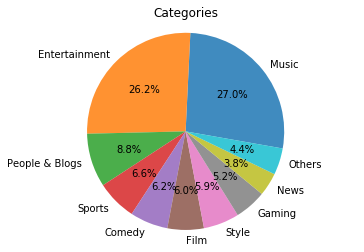

In [152]:
import plotly.plotly as py
import plotly.graph_objs as go
labels = ['Music','Entertainment','People & Blogs','Sports','Comedy','Film','Style','Gaming','News','Others']
values = [910,881,297,222,210,201,198,175,128,147]
colors = []
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels,autopct='%1.1f%%',
        shadow=False, startangle=-10, wedgeprops={'alpha':0.85})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Categories')
plt.show()
## Pie chart for categories

In [153]:
data=[['Entertainment', Entertainement], ['Music', Music], ['People_Blogs',People_Blogs],['Sports',Sports],['Comedy',Comedy],['Film',Film],['Style',Style],['Gaming',Gaming],['News',News]]
df = pd.DataFrame(data,columns=['Category','TestMAE'])
df
## dataframe comparing categories and the MAE for the related regression model

,Category,TestMAE
0,Entertainment,19.390521
1,Music,12.803829
2,People_Blogs,6.972047
3,Sports,6.522136
4,Comedy,7.616313
5,Film,8.778502
6,Style,6.312564
7,Gaming,6.234860
8,News,6.615810
